# Experimenting with Brain Data

(jupyter and virtual env installment following [this](https://www.digitalocean.com/community/tutorials/how-to-set-up-jupyter-notebook-with-python-3-on-ubuntu-18-04))

In [1]:
from convokit import Corpus, download
corpus = Corpus(filename=download("friends-corpus"))

In [2]:
corpus.print_summary_stats()

Number of Speakers: 700
Number of Utterances: 67373
Number of Conversations: 3107


The friends dataset documentation is found [here](https://convokit.cornell.edu/documentation/friends.html) 

In [2]:
import nibabel
fname = "example_nii/sub-01_func_sub-01_task-onebacktask_run-01_bold (1).nii.gz"
dat = nibabel.load(fname).get_fdata()
dat.shape

(64, 64, 35, 164)

Text(0.5, 0.98, 'Center slices for fMRI image')

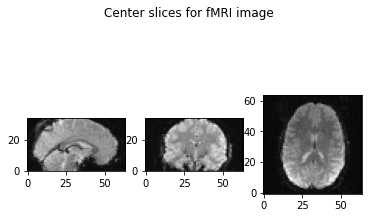

In [3]:
import matplotlib.pyplot as plt
def show_slices(slices):
    "Function to display row of image slices"
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        
slice_0 = dat[32, :, :, 5]
slice_1 = dat[:, 32, :, 5]
slice_2 = dat[:, :, 17, 5]

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for fMRI image")

In [17]:
fig, ax = plt.subplots(1,1)
for i in range(64):
    ax.imshow(dat[i,:,:,5].T, cmap="gray", origin="lower")
    fig.savefig(f'images/fig{i}.jpeg')
    plt.close(fig)

https://stackoverflow.com/questions/5967500/how-to-correctly-sort-a-string-with-a-number-inside

In [11]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]

In [18]:
import cv2
import numpy as np
import glob

img_array = []

filenames = glob.glob("images/*.jpeg")
filenames.sort(key = natural_keys)
for filename in filenames:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)
    
out = cv2.VideoWriter('project2.avi', cv2.VideoWriter_fourcc(*"DIVX"), 15, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [19]:
import subprocess
subprocess.call(['ffmpeg', '-i', 'project2.avi', 'project2.mov'])

0

In [20]:
from IPython.display import Video
Video("project2.mov")